### Iterated Prisioners Dilemma

In [1]:
import numpy as np
import math
from collections import deque
import matplotlib.pyplot as plt

In [2]:
# Define the reward function
def reward(action, action_other):
        # Payoffs in the Iterated Prisioners Dilemma
        # 0 is Defect, 1 is Cooperate
        if (action==1 and action_other==1):
            return 2
        
        elif (action==0 and action_other==1):
            return 3
        
        elif (action==1 and action_other==0):
            return 0
        
        elif (action==0 and action_other==0):
            return 1

### Functions

In [3]:
class Memory:
    def __init__(self, max_size):
        self.max_size = max_size
        self.buffer = deque(maxlen=max_size)

    def add(self, state, action, reward, next_state):
        experience = state, action, reward, next_state
        self.buffer.append(experience)

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        state, action, reward, next_state = zip(*batch)
        return state, action, reward, next_state

    def sample_recent(self, batch_size):
        state, action, reward, next_state = self.buffer[-1]
        return state, action, reward, next_state

    def __len__(self):
        return len(self.buffer)
    
    
class Agent:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)
        self.q_table = initialization(self.initialization_strategy, reward)
        self.state = 0
        self.memory = Memory(100000)
    
    def act(self):
        return select_action(self)

    def learn(self):        
        update_Q_values(self)

    def record(self, state, action, reward, next_state):
        self.memory.add(state, action, reward, next_state)   

In [4]:
# Initialization Strategies
def initialization(name, reward):
    if name == 'uniform': 
        q_table = np.zeros((num_states, num_actions))
        returns = []
        for action1 in range(num_actions):
            for action2 in range(num_actions): 
                 returns.append(reward(action1,action2)/(1-gamma))
            q_table[:,action1] = np.mean(returns)  
        return q_table

    if name == 'optimistic': 
        q_table = np.zeros((num_states, num_actions))
        returns = []
        for action1 in range(num_actions):
            for action2 in range(num_actions): 
                 returns.append(reward(action1,action2)/(1-gamma))
            q_table[:,action1] = np.mean(returns)+2*np.std(returns)
        return q_table

In [65]:
# Exploration strategies

def select_action(agent):
    # Select action given exploration strategy and Q-values
    global num_states, num_actions, alpha, gamma, epsilon, tau

    if agent.exploration_strategy == 'random':
        return np.random.randint(num_actions)
        
    elif agent.exploration_strategy == 'greedy':
        return np.argmax(q_table[state, :])
    
    elif agent.exploration_strategy == 'epsilon_greedy':
        if np.random.random() < epsilon:
            return np.random.randint(agent.num_actions)
        else:
            return np.argmax(agent.q_table[agent.state, :])
        
    elif agent.exploration_strategy == 'boltzmann':
            action_probs = []
            for action in range(num_actions):
                action_probs.append(math.exp(q_table[(state, action)] / tau))
            action_probs = [p / sum(action_probs) for p in action_probs]
            return np.random.choice(range(num_actions), p=action_probs)

In [66]:
def update_Q_values(agent):
    # Select action given exploration strategy and Q-values
    if agent.learning_strategy == 'qlearning':
        q_table = agent.q_table
        state, action, reward, next_state = agent.memory.sample_recent(1)
        agent.q_table[state, action] = (1 - agent.alpha) * agent.q_table[state, action] + agent.alpha * (reward + agent.gamma * np.max(agent.q_table[next_state, :]))
        return agent.q_table
    
    elif self.learning_strategy == 'double_qlearning':
        return 1

In [97]:
def update_exploration_params(agent):
    agent.epsilon = max(agent.epsilon_min, agent.epsilon - agent.epsilon_decay_rate)
    return agent.epsilon

In [103]:
def train(agent1, agent2, verbose=1000):
    
    global num_states, num_actions, alpha, gamma
    global epsilon, epsilon_min, epsilon_decay_rate, tau, tau_min, tau_decay_rate
    
    for episode in range(num_episodes): 

        # Loop over time steps within the episode
        for episode_idx in range(episode_length):  # goal state

            # Choose an action using an epsilon-greedy policy
            action1 = agent1.act()
            action2 = agent2.act()

            # Take the action and observe the reward and next state
            reward1 = reward(action1, action2)
            reward2 = reward(action2, action1)
            next_state1 = action2
            next_state2 = action1

            # Record experience
            agent1.record(agent1.state, action1, reward1, next_state1)
            agent2.record(agent2.state, action2, reward2, next_state2)

            # Update the Q-table using the Q-learning update rule
            agent1.learn()
            agent2.learn()

            # Update the current state
            agent1.state = next_state1
            agent2.state = next_state2
            
            # Update the exploration parameters
            agent1.epsilon = update_exploration_params(agent1)
            agent2.epsilon = update_exploration_params(agent2)

            if episode_idx % verbose == 0:
                print('\n')
                print(agent1.epsilon, action1, agent1.q_table)

In [104]:
def get_history(agent, k):
    agent_history = []
    last_experiences = list(agent.memory.buffer)[-k:]
    for i, experience in enumerate(last_experiences):
        state_, action_, reward_, next_state_ = experience
        agent_history.append([state_, action_, reward_, next_state_])
    return np.array(agent_history)

### Single Run

In [105]:
num_states = 2
num_actions = 2
alpha = 0.1  # learning rate
gamma = 0.9  # discount factor
epsilon = 1.0  # exploration rate
epsilon_min = 0.01 # minimum exploration rate
epsilon_decay_rate = 0.001 # rate at which exploration rate decays
tau = 5.0  # exploration rate
tau_min = 0.05 # minimum exploration rate
tau_decay_rate = 0.005 # rate at which exploration rate decay
num_episodes = 1
episode_length = 1000000
initialization_strategy = 'uniform'
exploration_strategy = 'epsilon_greedy'
learning_strategy = 'qlearning'

In [106]:
agent1 = agent2 = Agent(num_states=num_states, 
                          num_actions=num_actions, 
                          alpha=alpha,
                          gamma=gamma, 
                          epsilon=epsilon, 
                          epsilon_min=epsilon_min,
                          epsilon_decay_rate=epsilon_decay_rate, 
                          tau=tau,
                          tau_min=tau_min, 
                          tau_decay_rate=tau_decay_rate,
                          initialization_strategy=initialization_strategy,
                          exploration_strategy=exploration_strategy,
                          learning_strategy=learning_strategy,
                          reward=reward)

In [107]:
train(agent1, agent2)



0.998 1 [[20.19 15.  ]
 [20.   15.  ]]


0.01 1 [[20.16276816 19.23869284]
 [19.81296502 19.25472597]]


0.01 0 [[20.32519688 19.47462203]
 [20.57221587 19.72495576]]


0.01 1 [[18.88988367 17.6040938 ]
 [18.98806002 17.75986774]]


0.01 1 [[20.53262932 18.96360436]
 [19.88461002 19.46167883]]


0.01 0 [[18.3238847  18.16402033]
 [19.72124695 17.41627104]]


0.01 1 [[20.4388946  19.33697729]
 [20.15022461 18.85642325]]


0.01 0 [[20.36062034 18.75358268]
 [20.30648222 19.35276191]]


0.01 0 [[18.29939321 17.77990771]
 [18.2349854  17.37378582]]


0.01 1 [[19.01430356 17.69039517]
 [18.64657779 17.48211748]]


0.01 1 [[19.05554956 19.05191817]
 [19.2825456  17.85208183]]


0.01 0 [[21.12932362 19.7931369 ]
 [21.88605107 19.66426961]]


0.01 1 [[19.10158461 18.91486081]
 [19.0752701  18.72004346]]


0.01 1 [[18.08694873 18.03098462]
 [18.57882011 17.89398759]]


0.01 1 [[21.67602316 20.53366195]
 [21.27176501 19.97029467]]


0.01 0 [[19.46230437 18.22066986]
 [18.84492912 18.58589825]]



0.01 0 [[20.63407505 19.46238357]
 [20.09343005 19.44114802]]


0.01 1 [[19.67645235 18.47053119]
 [19.50917116 19.14289034]]


0.01 1 [[20.44400092 19.24249932]
 [21.0052585  19.47821899]]


0.01 0 [[20.20911838 19.00270181]
 [20.81481123 19.40604883]]


0.01 0 [[18.7707584  18.38857251]
 [18.1160975  17.71563894]]


0.01 1 [[19.83540601 18.70408354]
 [20.50483476 18.97934244]]


0.01 0 [[19.57556369 18.73026425]
 [19.18445521 18.42410014]]


0.01 1 [[20.82826667 19.85591438]
 [20.44944333 19.28239428]]


0.01 1 [[20.81151992 19.69862407]
 [20.46247587 19.25251365]]


0.01 1 [[20.42952969 19.20550213]
 [19.86902804 19.19953141]]


0.01 1 [[19.09730451 17.96472537]
 [18.90496533 17.75528647]]


0.01 1 [[19.46899874 18.54327848]
 [18.85523958 18.52176253]]


0.01 1 [[20.37844712 19.39136955]
 [19.78536721 19.04401415]]


0.01 0 [[19.79517571 18.52570631]
 [19.91261446 18.27988758]]


0.01 0 [[19.79310493 18.81817358]
 [20.30379539 18.73536735]]


0.01 1 [[20.69097779 18.99347322]
 [20



0.01 1 [[19.84927318 18.86242459]
 [19.69039906 18.32467482]]


0.01 1 [[18.80204698 17.93981874]
 [19.08427387 18.45699818]]


0.01 1 [[19.3465345  18.33945089]
 [19.6667873  18.28762447]]


0.01 1 [[19.0808171  17.83923675]
 [19.37823827 17.90528782]]


0.01 1 [[20.33625472 19.58739947]
 [20.54337542 19.35343164]]


0.01 0 [[20.12241044 19.25978126]
 [20.12492882 19.09194718]]


0.01 1 [[20.46860916 19.81618242]
 [20.60277262 19.7828216 ]]


0.01 1 [[20.08102518 18.94419287]
 [19.93535757 18.35250793]]


0.01 0 [[19.03359427 17.99397947]
 [19.09058087 17.96897481]]


0.01 1 [[20.25041221 19.09852086]
 [20.44736047 19.32815218]]


0.01 0 [[20.4525505  19.93183922]
 [20.97581378 20.05732088]]


0.01 1 [[19.68347966 18.76371502]
 [19.95897005 18.38529713]]


0.01 1 [[19.83095887 18.02007466]
 [20.13226016 18.77085163]]


0.01 1 [[20.85592259 19.3832271 ]
 [20.20271388 19.13162966]]


0.01 1 [[20.40231908 19.47633743]
 [20.03120945 19.68387652]]


0.01 1 [[22.0827337  21.03486495]
 [21



0.01 0 [[19.77767956 18.75257502]
 [19.37368765 18.21722159]]


0.01 0 [[20.14247991 18.85620994]
 [19.77757166 18.9151065 ]]


0.01 1 [[18.9867348  18.42520641]
 [19.13316893 18.59077752]]


0.01 1 [[19.34395564 18.67779031]
 [20.06888329 18.75998278]]


0.01 0 [[18.74223311 18.50583695]
 [19.31917998 18.60412134]]


0.01 0 [[19.72064776 18.89500783]
 [19.93315738 18.73486154]]


0.01 1 [[19.89049247 19.19249018]
 [19.62802533 18.75560691]]


0.01 1 [[20.02558214 19.0010557 ]
 [19.42653454 18.41384246]]


0.01 0 [[19.12799063 18.10639824]
 [18.90535506 17.82466212]]


0.01 1 [[19.06227454 18.18441087]
 [19.60775496 17.58377924]]


0.01 0 [[19.15286023 18.65090649]
 [19.35559649 18.50271559]]


0.01 0 [[20.71986362 19.13220514]
 [21.04894829 19.25981837]]


0.01 1 [[21.29033719 19.82302247]
 [20.63207789 20.45918772]]


0.01 0 [[20.31240246 19.91709596]
 [20.1024855  19.55830553]]


0.01 0 [[18.57467323 18.58266048]
 [18.63833469 18.09511367]]


0.01 0 [[19.61368763 18.26170285]
 [20



0.01 1 [[18.96637626 18.22147213]
 [20.15869719 18.92183467]]


0.01 0 [[19.89085578 19.27573368]
 [19.9656069  19.06380091]]


0.01 1 [[19.20069084 18.42614141]
 [19.15574498 19.05937067]]


0.01 0 [[19.05498461 19.33857052]
 [19.61270444 18.28933844]]


0.01 0 [[19.99650944 19.45023029]
 [20.57609819 18.35885863]]


0.01 0 [[19.34730937 18.25277073]
 [19.69769708 18.39020374]]


0.01 0 [[20.73966798 19.93772204]
 [20.72584937 19.46134941]]


0.01 1 [[20.24139196 19.49338449]
 [20.90129124 19.79704103]]


0.01 0 [[19.19338769 17.98894899]
 [18.95501061 17.78980524]]


0.01 1 [[18.78072192 18.52356423]
 [19.85134305 18.47983282]]


0.01 0 [[20.46904036 19.02727299]
 [20.71080897 19.15662727]]


0.01 1 [[19.87788352 19.54438718]
 [19.77004712 19.39185979]]


0.01 0 [[18.84494258 18.80729674]
 [19.79572842 18.67655217]]


0.01 1 [[19.3752342  18.89306138]
 [20.16233953 19.65976867]]


0.01 1 [[19.80922147 18.5601397 ]
 [19.6550766  19.14088239]]


0.01 0 [[19.9149062  18.81963004]
 [19



0.01 1 [[19.45366229 19.06110682]
 [19.43101819 18.90063977]]


0.01 1 [[19.47373297 18.58165669]
 [19.46329381 18.36534667]]


0.01 0 [[19.42689967 19.85114976]
 [19.93436604 19.33993169]]


0.01 1 [[20.32093584 19.40001974]
 [19.84671451 19.13380094]]


0.01 1 [[19.72405195 18.92311426]
 [20.08383601 18.91428043]]


0.01 0 [[20.17923866 18.77113138]
 [19.91972758 19.06710378]]


0.01 0 [[20.56614196 20.02077332]
 [20.85027124 19.75468556]]


0.01 1 [[20.2621291  19.64347425]
 [20.52595833 19.43436546]]


0.01 1 [[20.04606677 19.32405239]
 [19.8597604  19.42447227]]


0.01 0 [[19.74063224 18.83527885]
 [19.68442096 19.18753765]]


0.01 0 [[20.51285891 19.45883543]
 [21.09604519 19.69750235]]


0.01 1 [[20.06404724 19.01013186]
 [20.24083473 19.78220632]]


0.01 0 [[17.41424648 17.24034289]
 [18.32067902 16.31967776]]


0.01 1 [[20.19766828 18.73694955]
 [19.68138628 18.58842495]]


0.01 1 [[19.3859085  18.54078284]
 [20.00752631 18.4623605 ]]


0.01 0 [[20.00717154 18.47488453]
 [19



0.01 1 [[20.01336459 18.85079545]
 [19.70723569 18.97532727]]


0.01 0 [[18.6425812  17.85879921]
 [19.07441066 17.86265041]]


0.01 1 [[19.65588644 19.33410721]
 [19.91700775 18.99819634]]


0.01 1 [[18.76543199 18.7459439 ]
 [19.67523757 18.23706992]]


0.01 1 [[21.09792663 19.9810852 ]
 [21.21450891 19.58530375]]


0.01 0 [[21.49561245 19.80456765]
 [21.04085492 19.86592262]]


0.01 1 [[20.25383858 18.81382414]
 [19.56259926 18.68817832]]


0.01 0 [[20.07498589 19.10247826]
 [19.77944097 18.81273703]]


0.01 1 [[21.04638185 19.76043625]
 [20.89232256 19.33126074]]


0.01 1 [[20.79189461 19.4572715 ]
 [20.44234806 19.33520305]]


0.01 0 [[20.53860957 19.49317962]
 [20.46165194 19.44364581]]


0.01 0 [[20.58119677 18.84896518]
 [20.17768984 18.73750984]]


0.01 0 [[20.82570419 19.91418033]
 [20.54345209 19.7504347 ]]


0.01 0 [[21.72031425 20.1240624 ]
 [21.18675736 20.38961249]]


0.01 1 [[19.94217369 19.35465559]
 [19.67005992 19.05732225]]


0.01 0 [[20.13983158 18.96748097]
 [19



0.01 1 [[20.37655165 19.4900545 ]
 [20.79296414 19.41658417]]


0.01 1 [[20.02183879 19.53666738]
 [20.15228919 18.92603695]]


0.01 1 [[19.09960227 18.37781727]
 [19.08989552 18.20537059]]


0.01 0 [[19.18279175 19.47463036]
 [19.84331258 18.67872729]]


0.01 1 [[21.37328804 19.73315009]
 [20.93591691 20.37396752]]


0.01 0 [[19.96635153 19.10991656]
 [20.1710202  19.12654318]]


0.01 1 [[19.27575019 17.90052198]
 [19.64345232 18.82397747]]


0.01 1 [[19.7657093  18.59400683]
 [19.68646224 18.78910496]]


0.01 1 [[20.76008737 19.63938743]
 [20.1192349  18.97054811]]


0.01 1 [[19.76117062 18.82326277]
 [19.8572698  19.61739822]]


0.01 0 [[20.95286318 20.29127684]
 [21.07557621 19.29765831]]


0.01 1 [[20.65777861 19.64095502]
 [20.50937389 20.07140186]]


0.01 0 [[19.95958885 19.3362079 ]
 [20.13658899 18.98027271]]


0.01 0 [[19.46687305 18.77328084]
 [20.17493356 18.71480975]]


0.01 0 [[20.31522583 19.04817032]
 [20.41381455 19.82737221]]


0.01 1 [[19.81314043 18.76750827]
 [19

In [90]:
agent1.q_table

array([[20.19, 15.  ],
       [20.  , 15.  ]])

In [63]:
agent2.q_table

array([[14.94853327, 15.52324927],
       [14.99961263, 20.        ]])

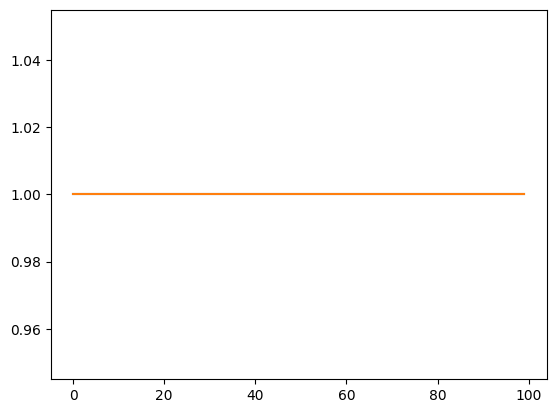

In [64]:
agent1_history = get_history(agent1,k)
agent2_history = get_history(agent2,k)

plt.plot(agent1_history[:,0])
plt.plot(agent2_history[:,0])

### Grid Search

In [181]:
import itertools
learning_rates = [0.1,0.25,0.5,0.75,0.9]
discount_factors = [0,0.25,0.5,0.75,0.99]
exploration_strategies = ['epsilon-greedy', 'boltzmann']
initialization_strategies = ['uniform', 'optimistic']
hyperparams_grid = list(itertools.product(learning_rates, discount_factors, exploration_strategies))
print(hyperparams_grid)

[(0.1, 0, 'epsilon-greedy'), (0.1, 0, 'boltzmann'), (0.1, 0.25, 'epsilon-greedy'), (0.1, 0.25, 'boltzmann'), (0.1, 0.5, 'epsilon-greedy'), (0.1, 0.5, 'boltzmann'), (0.1, 0.75, 'epsilon-greedy'), (0.1, 0.75, 'boltzmann'), (0.1, 0.99, 'epsilon-greedy'), (0.1, 0.99, 'boltzmann'), (0.25, 0, 'epsilon-greedy'), (0.25, 0, 'boltzmann'), (0.25, 0.25, 'epsilon-greedy'), (0.25, 0.25, 'boltzmann'), (0.25, 0.5, 'epsilon-greedy'), (0.25, 0.5, 'boltzmann'), (0.25, 0.75, 'epsilon-greedy'), (0.25, 0.75, 'boltzmann'), (0.25, 0.99, 'epsilon-greedy'), (0.25, 0.99, 'boltzmann'), (0.5, 0, 'epsilon-greedy'), (0.5, 0, 'boltzmann'), (0.5, 0.25, 'epsilon-greedy'), (0.5, 0.25, 'boltzmann'), (0.5, 0.5, 'epsilon-greedy'), (0.5, 0.5, 'boltzmann'), (0.5, 0.75, 'epsilon-greedy'), (0.5, 0.75, 'boltzmann'), (0.5, 0.99, 'epsilon-greedy'), (0.5, 0.99, 'boltzmann'), (0.75, 0, 'epsilon-greedy'), (0.75, 0, 'boltzmann'), (0.75, 0.25, 'epsilon-greedy'), (0.75, 0.25, 'boltzmann'), (0.75, 0.5, 'epsilon-greedy'), (0.75, 0.5, 'bo

### Q-learning with Epsilon Greedy Exploration

In [73]:
# Set up the Q-learning parameters
num_states = 2
num_actions = 2
alpha = 0.9  # learning rate
gamma = 0.9  # discount factor
epsilon = 1.0  # exploration rate
epsilon_min = 0.05 # minimum exploration rate
epsilon_decay_rate = 0.00005 # rate at which exploration rate decays
tau = 1.0  # exploration rate
tau_min = 0.05 # minimum exploration rate
tau_decay_rate = 0.00005 # rate at which exploration rate decay
num_episodes = 1
episode_length = 10000

# Initialize Q-learning parameters
q_table1 = uniform_initialization(num_actions, num_states, reward)
q_table2 = uniform_initialization(num_actions, num_states, reward)

print(q_table1)

[[20.   16.25]
 [20.   16.25]]


### Epsilon-Greedy Exploration